# Exercises

In [1]:
# connect to git to load all libraries and data

# get all files from the notebook here
!rm -rf population-methods-IT
!git clone https://github.com/irenetiem/population-methods-IT

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pickle
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath("population-methods/blob/main/02-SVM-decoding/code"))
# from utils import download_data

import urllib.request
from os import remove
import zipfile
from pathlib import Path
def download_data(url):

    if url.endswith('download'):
        URL = url
    else:
        URL = '/'.join((url, 'download'))

    if URL:
        response = urllib.request.urlopen(URL)
        data = response.read()
        response.close()

        with open('data.zip', 'wb') as f:
            f.write(data)

    with zipfile.ZipFile('data.zip', 'r') as zip_ref:
        zip_ref.extractall()

    remove('data.zip')

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})


#donwload lesson data
download_data('https://surfdrive.surf.nl/files/index.php/s/NrNbvEOH7SImYLn')

from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.preprocessing import StandardScaler

Cloning into 'population-methods-IT'...
remote: Enumerating objects: 308, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 308 (delta 81), reused 35 (delta 12), pack-reused 160 (from 1)
Receiving objects: 100% (308/308), 22.83 MiB | 9.03 MiB/s, done.
Resolving deltas: 100% (149/149), done.


In [2]:
# import data
with open('data/simulated_data1.pickle', 'rb') as handle:
    data = pickle.load(handle)

spike_times = data['spike_times']
stim_onsets = data['stim_onsets']
stim_type = data['stim_type']
stim_duration = data['stim_duration']

### Exercise 1
---
Use the sklearn `make_blobs()` function, in the same way that we used in the lesson, to generate a *non linearly separable* dataset with 2 features.  
Fit a linear SVM to the dataset many times, varying the slack hyperparameter $C$, and calculate the model performance in classifying the data.  
What is, approximately, a the best value of the $C$ hyperparameter for this dataset?

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

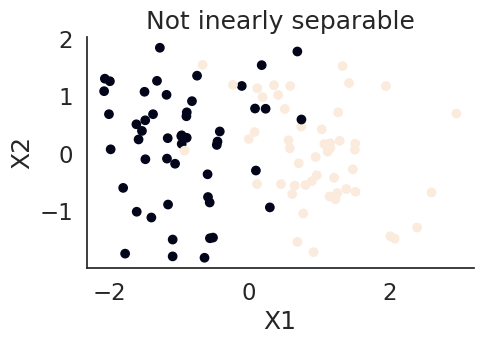

In [ ]:
X_nsep,y_nsep = make_blobs(n_samples=100,n_features =2,centers=[[-1,0],[1,0]],cluster_std=.8)

X_sep,y_sep = make_blobs(n_samples=100,n_features =2,centers=[[-1,0],[1,0]],cluster_std=.3,) # also this one for the y_sep

plt.figure(figsize=(5,3))
plt.title('Not inearly separable')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X_nsep[:,0],X_nsep[:,1],c=y_nsep)
plt.show()

In [ ]:
?svm.SVC

C : float, default=1.0
    Regularization parameter. The strength of the regularization is
    inversely proportional to C. Must be strictly positive. The penalty
    is a squared l2 penalty. For an intuitive visualization of the effects
    of scaling the regularization parameter C, see
    :ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.

In [ ]:
# vary hyperparameter C for this data

C_list = [0.01, 0.1, 0.5, 1, 1.5, 2, 5, 10, 20, 40, 70]

def plot_svm(C):
  plt.figure(figsize=(5,3))
  X,y = X_nsep,y_nsep
  svc_model = svm.SVC(kernel='linear',C=C);
  svc_model.fit(X, y)

  plt.scatter(X[:,0],X[:,1],c=y_nsep)
  # Constructing a hyperplane using a formula.
  w = svc_model.coef_[0]           # w consists of 2 elements
  b = svc_model.intercept_[0]      # b consists of 1 element
  x_points = np.linspace(-2,2)    # generating x-points from -1 to 1
  y_points = -(w[0] / w[1]) * x_points - b / w[1]
  plt.plot(x_points, y_points, c='r');
  plt.scatter(svc_model.support_vectors_[:, 0],
              svc_model.support_vectors_[:, 1],
              s=50,
              c='k',
              marker='x');
  w_hat = svc_model.coef_[0] / (np.sqrt(np.sum(svc_model.coef_[0] ** 2)))
  margin = 1 / np.sqrt(np.sum(svc_model.coef_[0] ** 2))
  decision_boundary_points = np.array(list(zip(x_points, y_points)))
  points_of_line_above = decision_boundary_points + w_hat * margin
  points_of_line_below = decision_boundary_points - w_hat * margin
  plt.plot(points_of_line_above[:, 0],
          points_of_line_above[:, 1],
          'b--')
  plt.plot(points_of_line_below[:, 0],
          points_of_line_below[:, 1],
          'g--')
  plt.ylim([min(X[:,1]),max(X[:,1])])
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.title(f'C = {C}')
  plt.show()

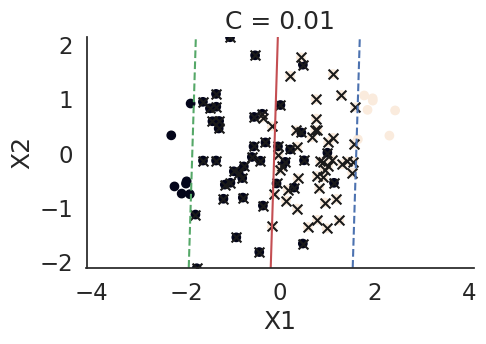

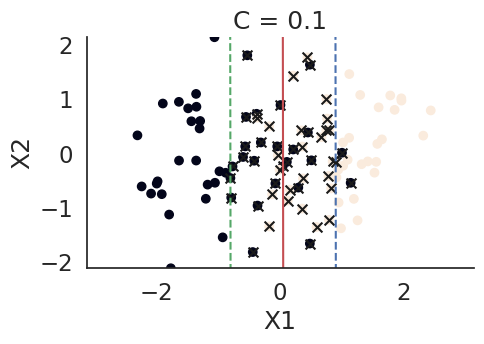

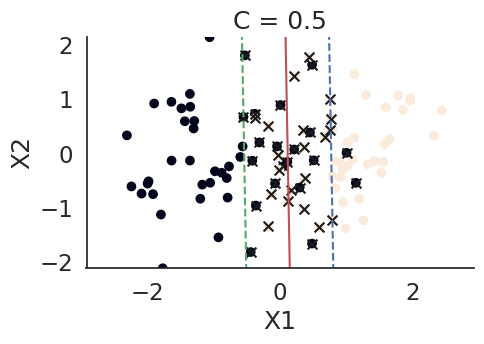

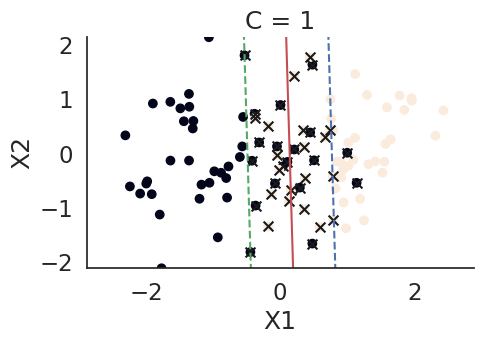

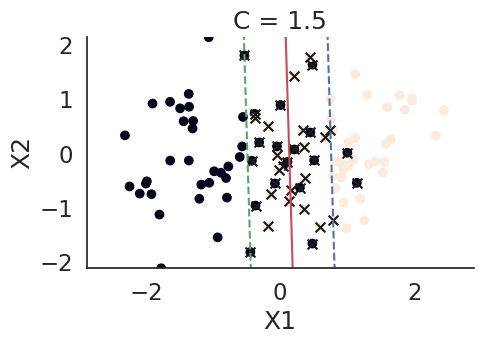

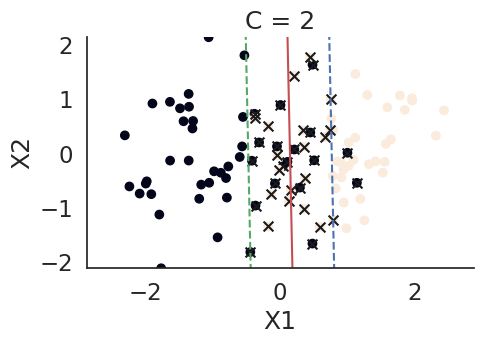

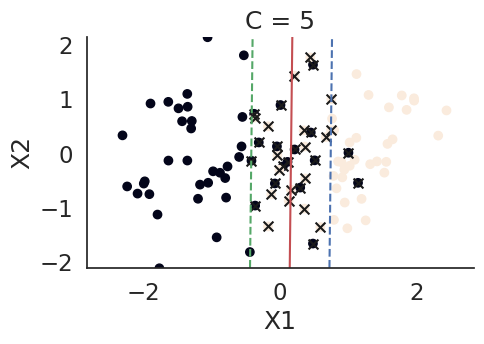

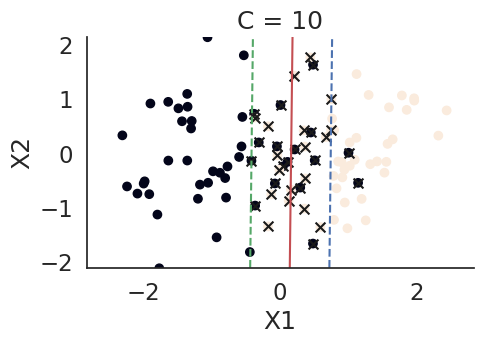

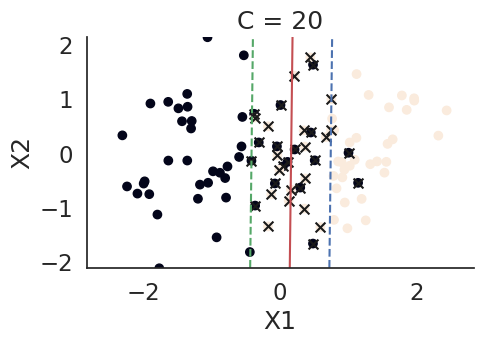

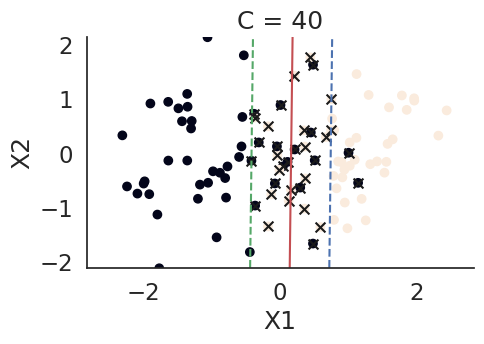

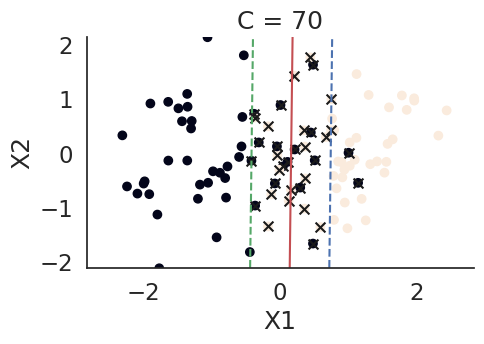

In [ ]:
for C in C_list:
  plot_svm(C)

Increasing C inversely makes the margins smaller and bending the red line more to the right. A very small C gives clearly poor results, after C=5 it does not seem to change much anymore. A C of around 5 would thus be best here.

### Exercise 2
---
Repeat exercise 1, but using a non-linear SVM model (the sklearn class `SVC` uses [Radial Basis Functions](https://en.wikipedia.org/wiki/Radial_basis_function) as a default, check its documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)).
To have a fairer assessment of the performance, train the model on a fraction (e.g. 80%) of the data, and test it on the other 20%.
Compare the performance of a linear SVC and a RBF SVC for dataset that are increaslingly non-linearly-separable.


In [ ]:
# RBF SVC

### Exercise 3
---
Use the code below to simulate new data.
Generate data and then decode the stimulus identity, see how the decoding performance change when you change the following:

- The amplitude of the noise in the firing rate
- The amplitude of the stimulus modulation of the firing rate
- The number of neurons

Plot and comment.

## Useful code
---


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [8]:
# just put it all in a function

def simulate_data(amplitude_noise_in_FR = 0, amplitude_stimulus_modulation = 1, number_of_neurons = 20):
  # simulation parameters
  n_cells = number_of_neurons
  n_stim_type = 2; # number of different stimuli
  sigma_stim = amplitude_stimulus_modulation # amplitude of stimulus related modulation
  average_firing_rate = 5; # average firing rate across the population

  # generate baseline rates from exponential distirbution
  cell_rate_baseline = np.random.exponential(average_firing_rate,size=n_cells)

  # create stimulus average responses, perturbing the population firng rate profile
  # we use a multiplicative modulation in opposite directions for the two stimuli
  modulation = sigma_stim*np.random.normal(0,1,size=n_cells)
  cell_rate_stim = {1: cell_rate_baseline * (1+modulation),2:cell_rate_baseline * (1-modulation)}
  # sets negative firng rate to 0
  cell_rate_stim[1][cell_rate_stim[1]<0]=0
  cell_rate_stim[2][cell_rate_stim[2]<0]=0

  # simulate spiking activity
  s_rate = 10000 # the sampling rate of our emulated recording system
  noise_rate = amplitude_noise_in_FR # we are going to add some spike noise non related to the task
  n_stim = 100 # number of stimuli

  stim_dur = 2 #stimulus duration (in seconds)
  is_interval = 3 # interval between stimuli  (in seconds)

  stim_onsets = np.arange(0,n_stim*(stim_dur+is_interval),(stim_dur+is_interval)) # onset time of each stimulus (in seconds)
  stim_type = np.asarray([1 for i in range(int(n_stim/2))]+[2 for i in range(int(n_stim/2))]) # identity of each stimulus
  np.random.shuffle(stim_type)

  time = np.arange(0,(n_stim+1)*(stim_dur+is_interval),1.0/s_rate) # vector of the sampled times.

  spike_times = []
  for cell in range(n_cells):
      spikes = np.random.poisson(cell_rate_baseline[cell]/s_rate,size=time.shape) + abs(np.random.normal(0, noise_rate)) # add the noise dependend on noise_Rate
      for i,stimulus in enumerate(stim_type):
          stim_idxs = np.arange(stim_onsets[i]*s_rate,(stim_onsets[i]+stim_dur)*s_rate)
          spikes[stim_idxs] = np.random.poisson(cell_rate_stim[stimulus][cell]/s_rate,size=stim_idxs.shape)

      spike_times.append(time[spikes>0])

  # save ouput
  out_dict = {'spike_times':spike_times,
              'stim_onsets':stim_onsets,
              'stim_type':stim_type,
              'stim_duration':stim_dur
              }

  with open('data/simulated_data1.pickle', 'wb') as handle:
      pickle.dump(out_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)


  onset = 1 # in seconds before stimulus onset
  offset = 1 # in second after stimulus offset

  binwidth = 0.1 # in seconds (100 ms)
  bins = np.arange(-onset,stim_duration+offset+binwidth,binwidth)

  n_cells = len(spike_times)
  n_trials= len(stim_type)

  X = np.zeros((n_cells,n_trials,len(bins)-1));
  for cell in range(n_cells):
      for trial in range(n_trials):

          # selects spikes that are in trial
          sp_idx = np.logical_and(spike_times[cell]>stim_onsets[trial]-onset,
                  spike_times[cell]<stim_onsets[trial]+stim_duration+offset)

          # centers spike times around stimulus onset
          sp_cntr = spike_times[cell][sp_idx]-stim_onsets[trial]
          #bins spikes
          spike_count,_ = np.histogram(sp_cntr,bins)
          #spike_count = zscore(spike_count)
          X[cell,trial,:] = spike_count


  n_splits = 5

  avg_performance = []
  std_performance = []

  for time_bin in range(X.shape[-1]):
          # setting 2-fold cross validation
          kf = StratifiedKFold(n_splits=n_splits,shuffle=True)
          fold_performance = []

          for train_index, test_index in kf.split(X[:,:,time_bin].T,stim_type):


                  X_train, X_test = X[:,train_index,time_bin].T, X[:,test_index,time_bin].T
                  y_train, y_test = stim_type[train_index], stim_type[test_index]

                  clf = svm.LinearSVC(max_iter=1000)
                  clf.fit(X_train, y_train)
                  fold_performance.append(clf.score(X_test,y_test))

          avg_performance.append(np.mean(fold_performance))
          std_performance.append(np.std(fold_performance))

  avg_performance = np.asarray(avg_performance)
  std_performance = np.asarray(std_performance)

  bin_centers = [(bins[i+1]+bins[i])/2 for i in range(len(bins)-1)]
  plt.plot(bin_centers,avg_performance, label = 'amplitude noise: {} \n amplitude modulation: {} \n number of neurons: {}'.format(amplitude_noise_in_FR, amplitude_stimulus_modulation, number_of_neurons))
  plt.fill_between(bin_centers,avg_performance-std_performance,
                  avg_performance+std_performance,alpha=0.2)

  plt.axhline(y=0.5,linestyle='--')#,label='chance level')
  plt.axvline(x=0,c='r')
  plt.axvline(x=2,c='r')
  # plt.title('amplitude noise: {} \n amplitude modulation: {} \n number of neurons: {}'.format(amplitude_noise_in_FR, amplitude_noise_in_FR, number_of_neurons))

  plt.legend(bbox_to_anchor=(1.1, 1.05))
  plt.xlabel('Time (s)')
  plt.ylabel('Decoding performance')

In [ ]:
# noise level dependency?

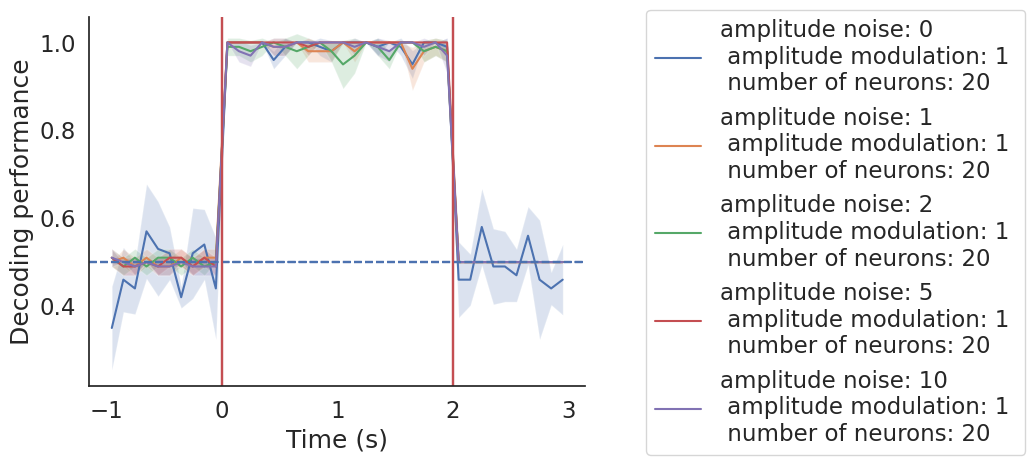

In [9]:
noise_levels = [0, 1, 2, 5, 10]
for noise_level in noise_levels:
  simulate_data(amplitude_noise_in_FR = noise_level)

Only the graph with zero added noise shows large fluctuations, but still has a high decoding performance. So it seems all noise levels here give good results.

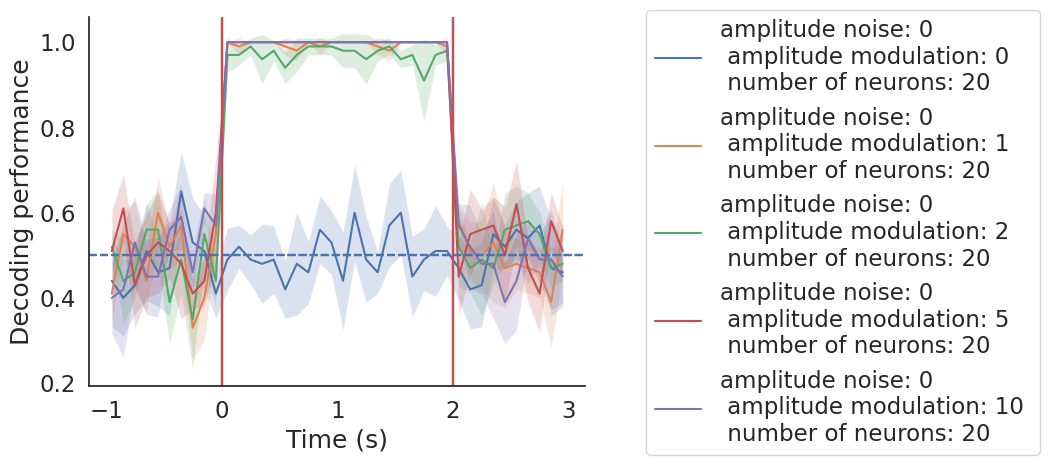

In [11]:
modulation_levels = [0, 1, 2, 5, 10]
for modulation_level in modulation_levels:
  simulate_data(amplitude_stimulus_modulation = modulation_level)

The one graph with zero noise modulation stays at 0.5 for decoding performance, the others are all at about 1.

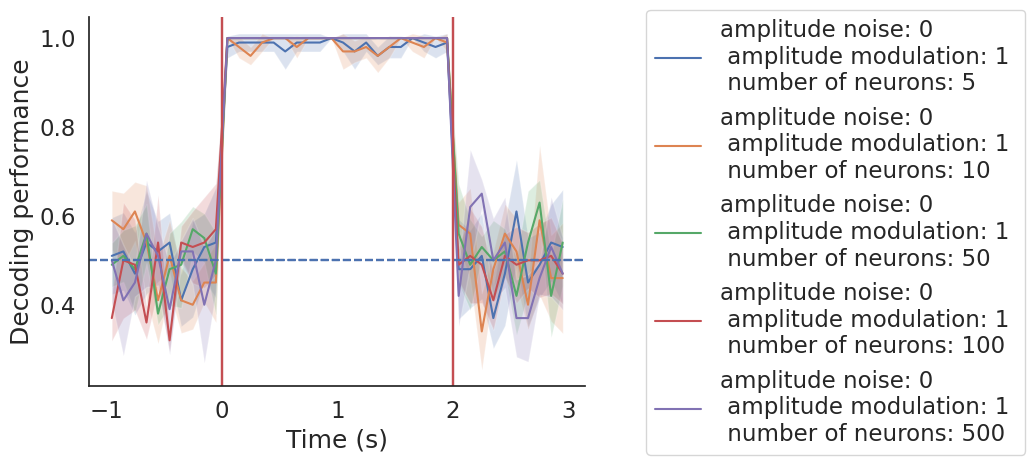

In [12]:
neuron_numbers = [5, 10, 50, 100, 500]
for neuron_number in neuron_numbers:
  simulate_data(number_of_neurons = neuron_number)

Here all graphs show good performance with small fluctuations in the (0, 2) time. However, the two graphs with the least amount of neurons (5 and 10) show the largest fluctuations and are thus slightly worse.